In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [300]:
df = pd.read_csv('house_data_complete.csv')

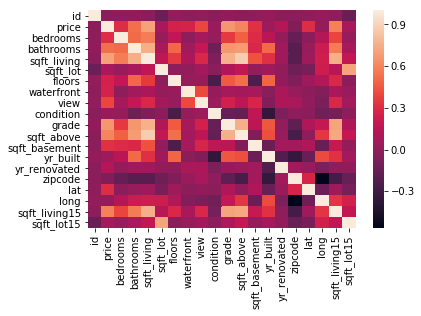

In [301]:
corrmat = df.corr()
sns.heatmap(corrmat)

In [302]:
x1 = np.array(df['grade'])
y1 = np.array(df['price'])
x1 = (x1-x1.mean())/x1.std()
y1 = (y1-y1.mean())/y1.std()

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(x1,y1,test_size=0.2)
X_train1,X_cv1,Y_train1,Y_cv1 = train_test_split(X_train1,Y_train1,test_size=0.2)

In [303]:
x2 = np.array(df['sqft_living'])
y2 = np.array(df['price'])
x2 = (x2-x2.mean())/x2.std()
y2 = (y2-y2.mean())/y2.std()

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(x2,y2,test_size=0.2)
X_train2,X_cv2,Y_train2,Y_cv2 = train_test_split(X_train2,Y_train2,test_size=0.2)

In [304]:
x3 = np.array(df['sqft_above'])
y3 = np.array(df['price'])
x3 = (x3-x3.mean())/x3.std()
y3 = (y3-y3.mean())/y3.std()

X_train3,X_test3,Y_train3,Y_test3 = train_test_split(x3,y3,test_size=0.2)
X_train3,X_cv3,Y_train3,Y_cv3 = train_test_split(X_train3,Y_train3,test_size=0.2)

In [305]:
x4 = np.array(df['sqft_living15'])
y4 = np.array(df['price'])
x4 = (x4-x4.mean())/x4.std()
y4 = (y4-y4.mean())/y4.std()

X_train4,X_test4,Y_train4,Y_test4 = train_test_split(x4,y4,test_size=0.2)
X_train4,X_cv4,Y_train4,Y_cv4 = train_test_split(X_train4,Y_train4,test_size=0.2)

In [306]:
lent = len(X_train1)
lentcv = len(X_cv1)

In [307]:
def LinearRegressor(trainX, trainY, testX, testY, cvX, cvY, rate, tolerance):
    trainX = np.c_[np.ones(trainX.shape[0]), trainX]
    cvX = np.c_[np.ones(cvX.shape[0]), cvX]
    w = np.random.randn(trainX.shape[1])
    iterations = 1
    errors = np.array([])
    errorscv = np.array([])
    while True:
        h = trainX.dot(w)
        hcv = cvX.dot(w)

        error = h - trainY
        errorcv = hcv - cvY
        errors = np.append(errors, np.sum(error))
        errorscv = np.append(errorscv, np.sum(errorcv))
        mse = (1.0/lent)* np.sum(error**2)
        msecv = (1.0/lentcv)* np.sum(errorcv**2)

        deltaW = (1.0/lent)*error.dot(trainX)
        new_w = w - rate * deltaW
        if np.sum(abs(new_w - w)) < tolerance:
            print("Converged")
            print(iterations)
            break
        iterations += 1
        w = new_w
        
    print("Last weight Vector =", w)
    testX = np.c_[np.ones(testX.shape[0]), testX]
    testY_pred = testX.dot(w)
    error = (testY - testY_pred)
    mse = (1.0/len(testX))*np.sum(np.power(error, 2))
    print("Test Cost =", mse)
    return w, errors, errorscv

In [308]:
w1, error1, errorcv1 = LinearRegressor(X_train1, Y_train1, X_test1, Y_test1, X_cv1, Y_cv1, 0.8, 1e-6)

Converged
10
Last weight Vector = [0.00741412 0.67747956]
Test Cost = 0.49132580497545036


In [309]:
w2, error2, errorcv2 = LinearRegressor(X_train2, Y_train2, X_test2, Y_test2, X_cv2, Y_cv2, 0.8, 1e-6)

Converged
11
Last weight Vector = [-0.00159183  0.68895199]
Test Cost = 0.5473070740162451


In [310]:
w3, error3, errorcv3 = LinearRegressor(X_train3, Y_train3, X_test3, Y_test3, X_cv3, Y_cv3, 0.8, 1e-6)

Converged
10
Last weight Vector = [0.00617994 0.61555141]
Test Cost = 0.6433146501550455


In [311]:
w4, error4, errorcv4 = LinearRegressor(X_train4, Y_train4, X_test4, Y_test4, X_cv4, Y_cv4, 0.8, 1e-6)

Converged
10
Last weight Vector = [-0.00266515  0.59229233]
Test Cost = 0.6175408076504922


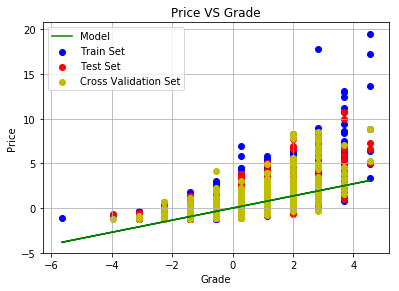

In [312]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])

x11 = np.c_[np.ones(x1.shape[0]), x1]


ax1.plot(x1, x11.dot(w1), c='g', label='Model')
ax1.scatter(X_train1, Y_train1, c='b', label='Train Set')
ax1.scatter(X_test1, Y_test1, c='r', label='Test Set')
ax1.scatter(X_cv1, Y_cv1, c='y', label='Cross Validation Set')
ax1.grid()
ax1.legend(loc='best')
ax1.set_xlabel('Grade')
ax1.set_ylabel('Price')
ax1.set_title('Price VS Grade')

plt.show()

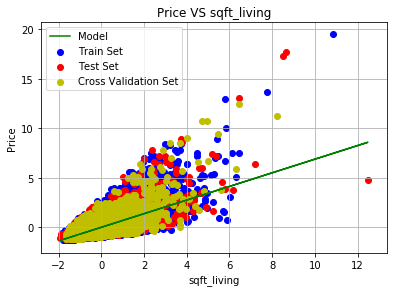

In [313]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])

x12 = np.c_[np.ones(x2.shape[0]), x2]


ax2.plot(x2, x12.dot(w2), c='g', label='Model')
ax2.scatter(X_train2, Y_train2, c='b', label='Train Set')
ax2.scatter(X_test2, Y_test2, c='r', label='Test Set')
ax2.scatter(X_cv2, Y_cv2, c='y', label='Cross Validation Set')
ax2.grid()
ax2.legend(loc='best')
ax2.set_xlabel('sqft_living')
ax2.set_ylabel('Price')
ax2.set_title('Price VS sqft_living')

plt.show()

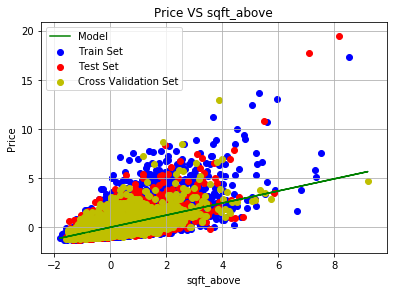

In [314]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,0.8,0.8])

x13 = np.c_[np.ones(x3.shape[0]), x3]


ax3.plot(x3, x13.dot(w3), c='g', label='Model')
ax3.scatter(X_train3, Y_train3, c='b', label='Train Set')
ax3.scatter(X_test3, Y_test3, c='r', label='Test Set')
ax3.scatter(X_cv3, Y_cv3, c='y', label='Cross Validation Set')
ax3.grid()
ax3.legend(loc='best')
ax3.set_xlabel('sqft_above')
ax3.set_ylabel('Price')
ax3.set_title('Price VS sqft_above')

plt.show()

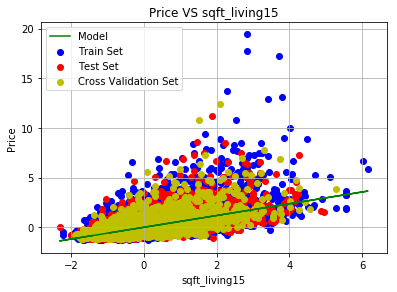

In [315]:
fig4 = plt.figure()
ax4 = fig4.add_axes([0.1,0.1,0.8,0.8])

x14 = np.c_[np.ones(x4.shape[0]), x4]


ax4.plot(x4, x14.dot(w4), c='g', label='Model')
ax4.scatter(X_train4, Y_train4, c='b', label='Train Set')
ax4.scatter(X_test4, Y_test4, c='r', label='Test Set')
ax4.scatter(X_cv4, Y_cv4, c='y', label='Cross Validation Set')
ax4.grid()
ax4.legend(loc='best')
ax4.set_xlabel('sqft_living15')
ax4.set_ylabel('Price')
ax4.set_title('Price VS sqft_living15')

plt.show()

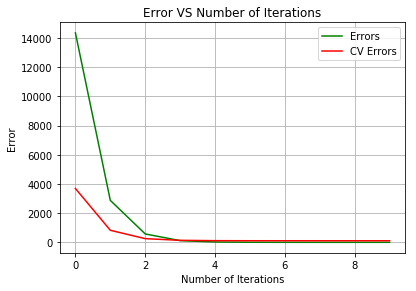

In [316]:
fig5 = plt.figure()
ax5 = fig5.add_axes([0.1,0.1,0.8,0.8])

ax5.plot(np.arange(error1.shape[0]), error1, c='g', label="Errors")
ax5.plot(np.arange(errorcv1.shape[0]), errorcv1, c='r', label="CV Errors")
ax5.legend(loc='best')
ax5.set_xlabel('Number of Iterations')
ax5.set_ylabel('Error')
ax5.set_title('Error VS Number of Iterations')
ax5.grid()
plt.show()

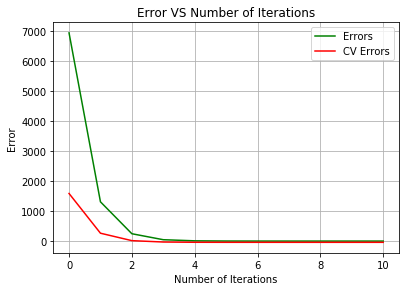

In [317]:
fig6 = plt.figure()
ax6 = fig6.add_axes([0.1,0.1,0.8,0.8])

ax6.plot(np.arange(error2.shape[0]), error2, c='g', label="Errors")
ax6.plot(np.arange(errorcv2.shape[0]), errorcv2, c='r', label="CV Errors")
ax6.legend(loc='best')
ax6.set_xlabel('Number of Iterations')
ax6.set_ylabel('Error')
ax6.set_title('Error VS Number of Iterations')
ax6.grid()
plt.show()

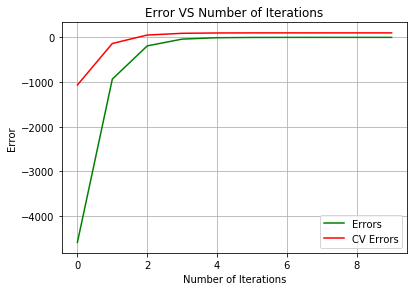

In [318]:
fig7 = plt.figure()
ax7 = fig7.add_axes([0.1,0.1,0.8,0.8])

ax7.plot(np.arange(error3.shape[0]), error3, c='g', label="Errors")
ax7.plot(np.arange(errorcv3.shape[0]), errorcv3, c='r', label="CV Errors")
ax7.legend(loc='best')
ax7.set_xlabel('Number of Iterations')
ax7.set_ylabel('Error')
ax7.set_title('Error VS Number of Iterations')
ax7.grid()
plt.show()

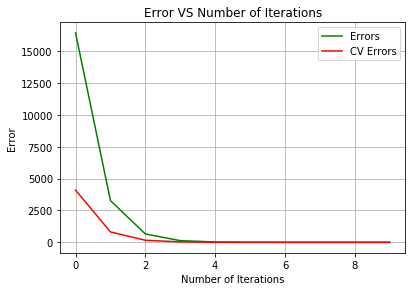

In [319]:
fig8 = plt.figure()
ax8 = fig8.add_axes([0.1,0.1,0.8,0.8])

ax8.plot(np.arange(error4.shape[0]), error4, c='g', label="Errors")
ax8.plot(np.arange(errorcv4.shape[0]), errorcv4, c='r', label="CV Errors")
ax8.legend(loc='best')
ax8.set_xlabel('Number of Iterations')
ax8.set_ylabel('Error')
ax8.set_title('Error VS Number of Iterations')
ax8.grid()
plt.show()